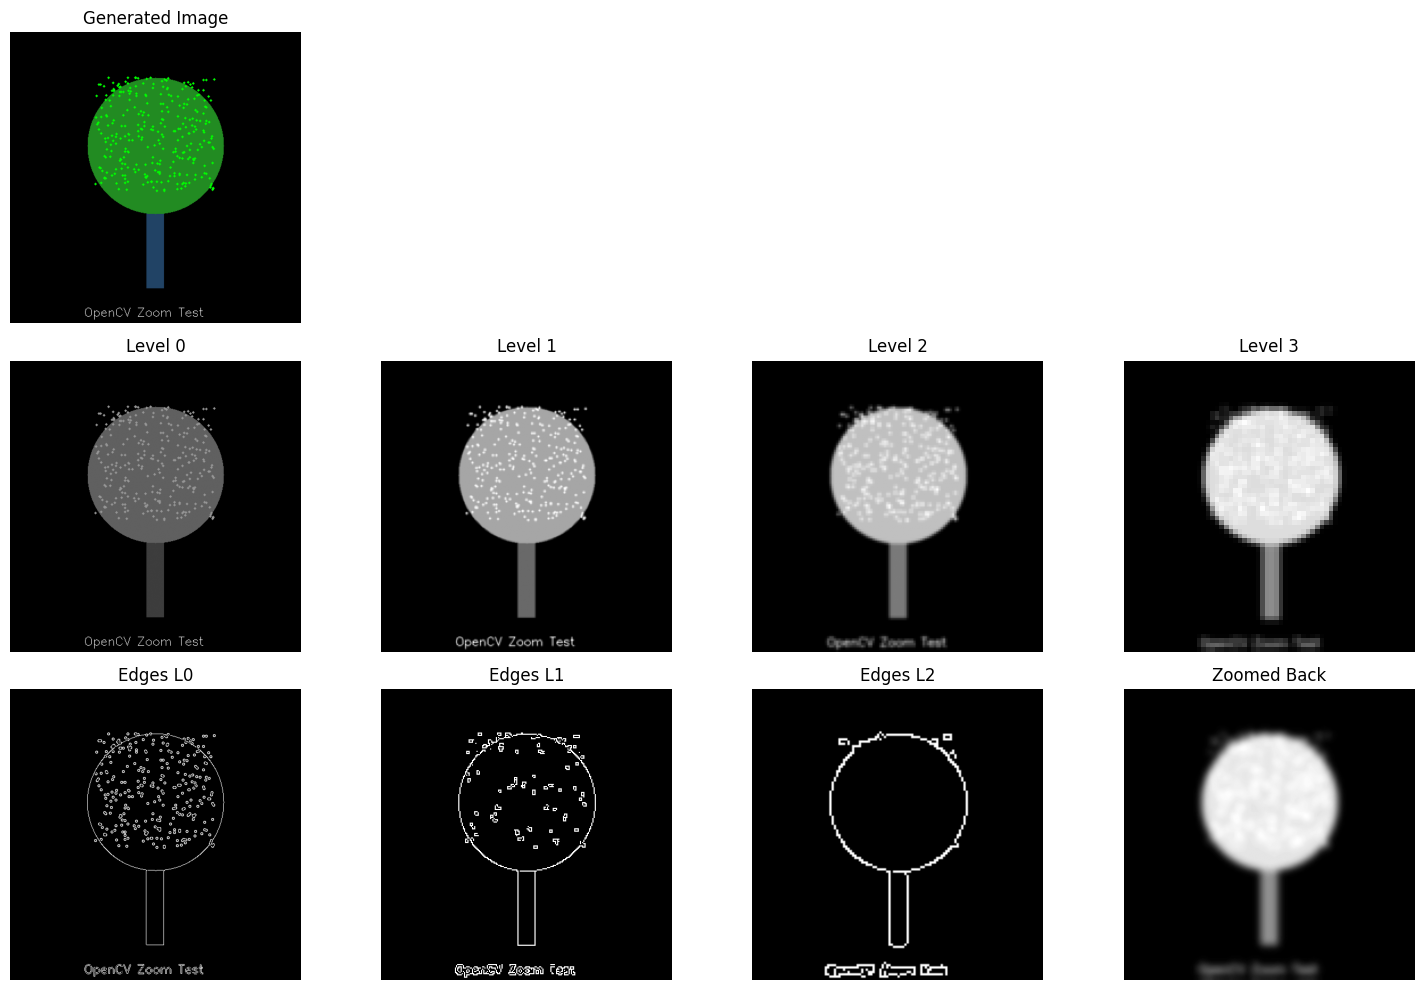


Observations:
Level 0: Shape = (512, 512)
Level 1: Shape = (256, 256)
Level 2: Shape = (128, 128)
Level 3: Shape = (64, 64)

Fine leaf textures disappear as resolution decreases.
Zooming back does NOT restore lost fine details (pixelation visible).


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# =====================================
# 1. Generate Synthetic Sample Image
# =====================================
def generate_sample_image(width=512, height=512):
    img = np.zeros((height, width, 3), dtype=np.uint8)

    # Large Object (Tree trunk)
    cv2.rectangle(img, (240, 250), (270, 450), (101, 67, 33), -1)

    # Large Object (Tree crown)
    cv2.circle(img, (256, 200), 120, (34, 139, 34), -1)

    # Small Texture (Leaves as small circles)
    for _ in range(300):
        x = np.random.randint(150, 360)
        y = np.random.randint(80, 280)
        cv2.circle(img, (x, y), 2, (0, 255, 0), -1)

    # Add small text (fine detail)
    cv2.putText(img, "OpenCV Zoom Test", (130, 500),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 1)

    return img


# =====================================
# 2. Gaussian Pyramid Builder
# =====================================
def build_gaussian_pyramid(image, levels=4):
    pyramid = [image]
    for _ in range(1, levels):
        image = cv2.pyrDown(image)
        pyramid.append(image)
    return pyramid


# =====================================
# 3. Apply Canny to Each Level
# =====================================
def apply_canny(pyramid, low=100, high=200):
    return [cv2.Canny(img, low, high) for img in pyramid]


# =====================================
# 4. Upsample Back to Original
# =====================================
def upsample_to_original(image, target_shape):
    while image.shape[0] < target_shape[0]:
        image = cv2.pyrUp(image)
    return cv2.resize(image, (target_shape[1], target_shape[0]))


# =====================================
# MAIN PROGRAM
# =====================================
# Generate image
image = generate_sample_image()

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Build Gaussian Pyramid
levels = 4
gaussian_pyramid = build_gaussian_pyramid(gray, levels)

# Apply Edge Detection
edges = apply_canny(gaussian_pyramid)

# Zoom back smallest level
zoomed_back = upsample_to_original(
    gaussian_pyramid[-1],
    gaussian_pyramid[0].shape
)

# =====================================
# Display Results
# =====================================
plt.figure(figsize=(15, 10))

# Original
plt.subplot(3, levels, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Generated Image")
plt.axis("off")

# Gaussian Pyramid
for i in range(levels):
    plt.subplot(3, levels, levels + i + 1)
    plt.imshow(gaussian_pyramid[i], cmap='gray')
    plt.title(f"Level {i}")
    plt.axis("off")

# Edges + Zoom Back
for i in range(levels):
    plt.subplot(3, levels, 2 * levels + i + 1)
    if i < levels - 1:
        plt.imshow(edges[i], cmap='gray')
        plt.title(f"Edges L{i}")
    else:
        plt.imshow(zoomed_back, cmap='gray')
        plt.title("Zoomed Back")
    plt.axis("off")

plt.tight_layout()
plt.show()

# =====================================
# Observations
# =====================================
print("\nObservations:")
for i in range(levels):
    print(f"Level {i}: Shape = {gaussian_pyramid[i].shape}")

print("\nFine leaf textures disappear as resolution decreases.")
print("Zooming back does NOT restore lost fine details (pixelation visible).")